In [1]:
"""
"""
import numpy as np
import seaborn as sns
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter
from datetime import datetime

In [2]:
# set the label fontsize
xy_label_fontsize = 16

# set the start and end times for our subselection of data
##start = snakemake.config["plt_t0"]
##end = snakemake.config["plt_tf"]

# force 'normal' text style for math text
mpl.rcParams['mathtext.default'] = 'regular'

In [3]:
def major_ticks(x, pos=None):
    """Set the major ticks according 
    to this custom style
    """
    x = mdates.num2date(x)
    if pos == 0:
        fmt = "%-d\n%b %Y\n%I %p"
    else:
        fmt = "%-d"
    return x.strftime(fmt)

In [4]:
# set global seaborn params
sns.set("paper", "ticks", color_codes=True, palette='colorblind')

In [5]:
# load the QuantAQ data
mit = pd.read_csv('MOD-00398-raw.csv')
mit['localtime'] = pd.to_datetime(mit['timestamp_local'],format="%Y-%m-%dT%H:%M:%SZ") #convert timestamp column to pandas timestamp format
mit = mit.set_index('localtime',append=False) #setindex as local time

mit.head()

,timestamp,id,timestamp_local,sn,rh,temp,bin0,bin1,bin2,bin3,...,o3,co2,pm1_model_id,pm25_model_id,pm10_model_id,co_model_id,no_model_id,no2_model_id,o3_model_id,co2_model_id
localtime,,,,,,,,,,,,,,,,,,,,,
2024-10-01 23:59:36,2024-10-01T23:59:36Z,223454674,2024-10-01T23:59:36Z,MOD-00398,84.5,26.9,8.571,2.251,0.404,0.058,...,6.281,825.873,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776
2024-10-01 23:58:36,2024-10-01T23:58:36Z,223452685,2024-10-01T23:58:36Z,MOD-00398,84.5,26.9,9.192,2.205,0.439,0.063,...,6.281,826.475,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776
2024-10-01 23:57:36,2024-10-01T23:57:36Z,223452683,2024-10-01T23:57:36Z,MOD-00398,84.6,26.9,8.732,2.306,0.418,0.058,...,5.896,825.271,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776
2024-10-01 23:56:36,2024-10-01T23:56:36Z,223452684,2024-10-01T23:56:36Z,MOD-00398,84.6,26.9,8.895,2.255,0.404,0.097,...,5.896,830.088,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776
2024-10-01 23:55:36,2024-10-01T23:55:36Z,223452681,2024-10-01T23:55:36Z,MOD-00398,84.6,26.9,8.884,2.298,0.467,0.083,...,5.896,829.968,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776


In [6]:
#PM2.5_corr = 2.83 + 0.65*purpleair + 0.0937*RH + 0.028*T
#corr = 2.83 + 0.65*mit['pm25']+0.0937*mit['rh']+0.028*mit['temp']
#corr
#mit['corr'] = corr
##mit
#mit
#mit2 = mit.resample('M').mean()
#print(mit2['corr'])

#mit.to_csv('alldata_for_Rodriguez.csv')

In [7]:
# resample the data to 15 min mean to make it easier to plot
#start = '2022-06-09 23:00'
#fin = '2022-06-12 00:00'
mit = mit.resample('D').mean(numeric_only=True)
mit

,id,rh,temp,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,o3,co2,pm1_model_id,pm25_model_id,pm10_model_id,co_model_id,no_model_id,no2_model_id,o3_model_id,co2_model_id
localtime,,,,,,,,,,,,,,,,,,,,,
2023-08-16,5.621591e+07,57.458182,32.173566,41.033158,6.740021,2.520683,0.672443,0.578218,0.235260,0.121060,...,31.225194,512.634697,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776.0
2023-08-17,5.628174e+07,71.758416,27.540594,35.157564,3.565465,0.922475,0.222307,0.200554,0.099505,0.051475,...,20.774455,579.014574,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776.0
2023-08-18,5.661128e+07,70.889184,28.686348,15.517511,1.524703,0.406447,0.093707,0.092623,0.052030,0.030330,...,30.126961,558.111004,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776.0
2023-08-19,5.678012e+07,72.020000,28.164167,9.808313,1.086467,0.273124,0.063049,0.063018,0.039499,0.027278,...,26.162499,578.413083,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776.0
2023-08-20,5.697485e+07,67.525694,29.604792,18.561902,2.231060,0.641844,0.151553,0.163474,0.099627,0.059907,...,26.006711,565.489960,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-27,2.202550e+08,80.460694,27.086319,8.756299,1.053232,0.165393,0.040964,0.054299,0.031024,0.019672,...,13.281231,765.546067,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776.0
2024-09-28,2.209548e+08,77.246736,28.214583,8.637472,0.932640,0.150556,0.040247,0.054685,0.031379,0.019215,...,13.086358,754.759773,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776.0
2024-09-29,2.216726e+08,75.523686,29.252348,10.968468,1.915714,0.348489,0.068155,0.072759,0.038840,0.027345,...,13.664020,754.301930,10803.0,10804.0,10805.0,10796.0,10791.0,10786.0,10781.0,10776.0


Text(0.5, 0.92, 'MOD-00398 Kurawura Akura')

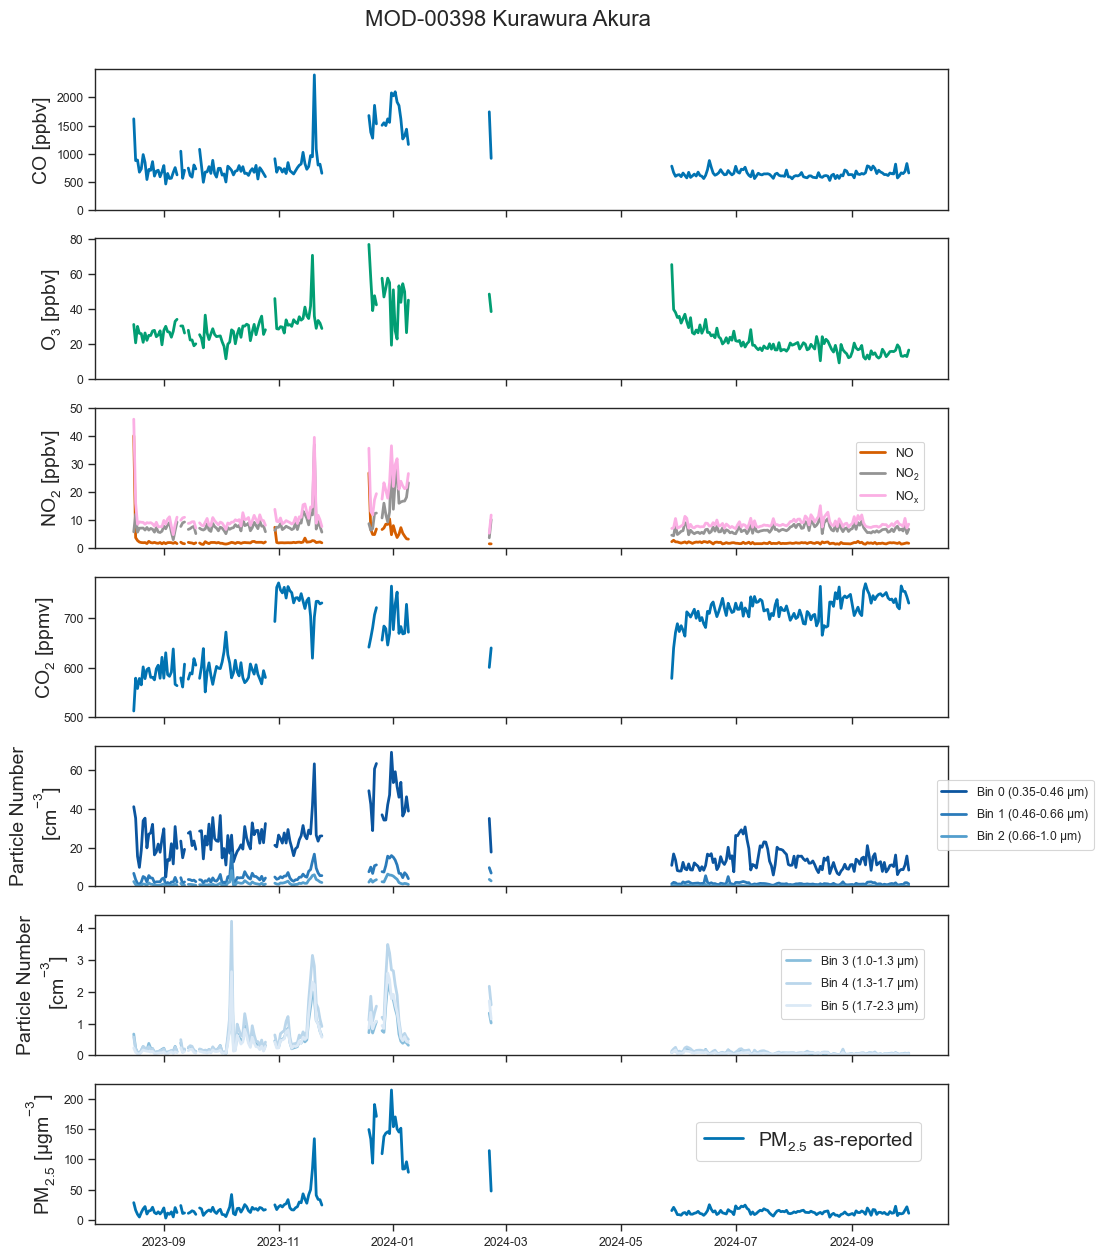

In [8]:
# set up the matplotlib figure
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(11, 15), sharex=True)

# grab the current color palette
cmap = sns.color_palette()

# plot the CO data and label the axis
ax[0].plot(mit['co'], lw=2, label="$CO$", color=sns.color_palette()[0])
ax[0].set_ylabel("CO [ppbv]", fontsize=14)
ax[0].set_ylim(0, None)

# plot the o3 on the second axis
ax[1].plot(mit['o3'], lw=2, label="$O_3$", color=cmap[2])
ax[1].set_ylabel("$O_3$ [ppbv]", fontsize=14)
ax[1].set_ylim(0, None)


#plot nox on the 3rd axis
ax[2].plot(mit['no'], lw=2, label="$NO$", color=cmap[3])
ax[2].plot(mit['no2'], lw=2, label="$NO_2$", color=cmap[7])
ax[2].plot(mit['no2']+mit['no'], lw=2, label="$NO_x$", color=cmap[6])
ax[2].set_ylabel("$NO_2$ [ppbv]", fontsize=14)
ax[2].legend(bbox_to_anchor=(0.98, .8))
ax[2].set_ylim(0, 50)


#plot co2 on the 4th row
ax[3].plot(mit['co2'], lw=2, label="$CO_2$", color=sns.color_palette()[0])
ax[3].set_ylabel("$CO_2$ [ppmv]", fontsize=14)


# plot the OPC bins on the 5th row
ax[4].plot(mit['bin0'], lw=2, label='Bin 0 (0.35-0.46 $\mu m$)', color=sns.color_palette("Blues_r", 6)[0])
ax[4].plot(mit['bin1'], lw=2, label='Bin 1 (0.46-0.66 $\mu m$)', color=sns.color_palette("Blues_r", 6)[1])
ax[4].plot(mit['bin2'], lw=2, label='Bin 2 (0.66-1.0 $\mu m$)', color=sns.color_palette("Blues_r", 6)[2])
ax[4].set(
    ylim=(0, None))
ax[4].set_ylabel("Particle Number\n $[cm^{-3}]$", fontsize=14)
ax[4].legend(bbox_to_anchor=(0.98, .8))


ax[5].plot(mit['bin3'], lw=2, label='Bin 3 (1.0-1.3 $\mu m$)', color=sns.color_palette("Blues_r", 6)[3])
ax[5].plot(mit['bin4'], lw=2, label='Bin 4 (1.3-1.7 $\mu m$)', color=sns.color_palette("Blues_r", 6)[4])
ax[5].plot(mit['bin5'], lw=2, label='Bin 5 (1.7-2.3 $\mu m$)', color=sns.color_palette("Blues_r", 6)[5])
ax[5].set(
    ylim=(0, None))
ax[5].set_ylabel("Particle Number\n $[cm^{-3}]$", fontsize=14)
ax[5].legend(bbox_to_anchor=(0.98, .8))



#plot pm25 on the 7th row
ax[6].plot(mit['pm25'], lw=2, label="$PM_{2.5}$ as-reported", color=sns.color_palette()[0])
#ax[6].plot(mit['corr'], lw=2, label="$PM_{2.5}$ corrected", color='black',linestyle='dotted')
ax[6].set_ylabel("$PM_{2.5}$ [$\mu g m^{-3}$]",fontsize=14)
ax[6].legend(bbox_to_anchor=(0.98, .8),fontsize=14)
plt.suptitle('MOD-00398 Kurawura Akura',x=0.5,y=0.92,fontsize=16)

#ax[6].set(ylim=(0,150))
#fig.savefig('timeseries_conc_MOD-00400.png', dpi=350, bbox_inches='tight')

In [9]:

# label the panels
pct = 0.9
#ax[0].text("2018-1-11 01:00", pct*ax[0].get_ylim()[-1], "(a)")
#ax[1].text("2018-1-11 01:00", pct*ax[1].get_ylim()[-1], "(b)")
#ax[2].text("2018-1-11 01:00", pct*ax[2].get_ylim()[-1], "(c)")


# set titles for each panel
ax[0].set_title("(a) CO", fontsize=14)
ax[1].set_title("(b) $O_3$", fontsize=14)
ax[2].set_title("(c) $NO_x$", fontsize=14)
ax[3].set_title("(d) $CO_2$", fontsize=14)
ax[4].set_title("(e) OPC Particle Counts", fontsize=14)
ax[5].set_title("(f) OPC Particle Counts", fontsize=14)
ax[6].set_title("(g) $PM_{2.5}$", fontsize=14)

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)
ax[3].tick_params(axis='both', which='major', labelsize=14)
ax[4].tick_params(axis='both', which='major', labelsize=14)
ax[5].tick_params(axis='both', which='major', labelsize=14)
ax[6].tick_params(axis='both', which='major', labelsize=14)
ax[6].locator_params(axis='y', nbins=4)
ax[5].locator_params(axis='y', nbins=4)
ax[4].locator_params(axis='y', nbins=4)
ax[3].locator_params(axis='y', nbins=4)
ax[2].locator_params(axis='y', nbins=4)
ax[1].locator_params(axis='y', nbins=4)
ax[0].locator_params(axis='y', nbins=4)


#start = '2022-06-07 4:00'
#fin = '2022-06-11 12:00'

#ax[6].vlines(x=[datetime(2022,6,7,4,0,0),datetime(2022,6,12,12,0,0)],ymin=-5, ymax=300, color='red',linestyle='dashed')


# remove the tiop and right spine
sns.despine()

# force a tight layout
plt.tight_layout()

# save the figure
fig.savefig('timeseries_conc_MOD-00398.png', dpi=350, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

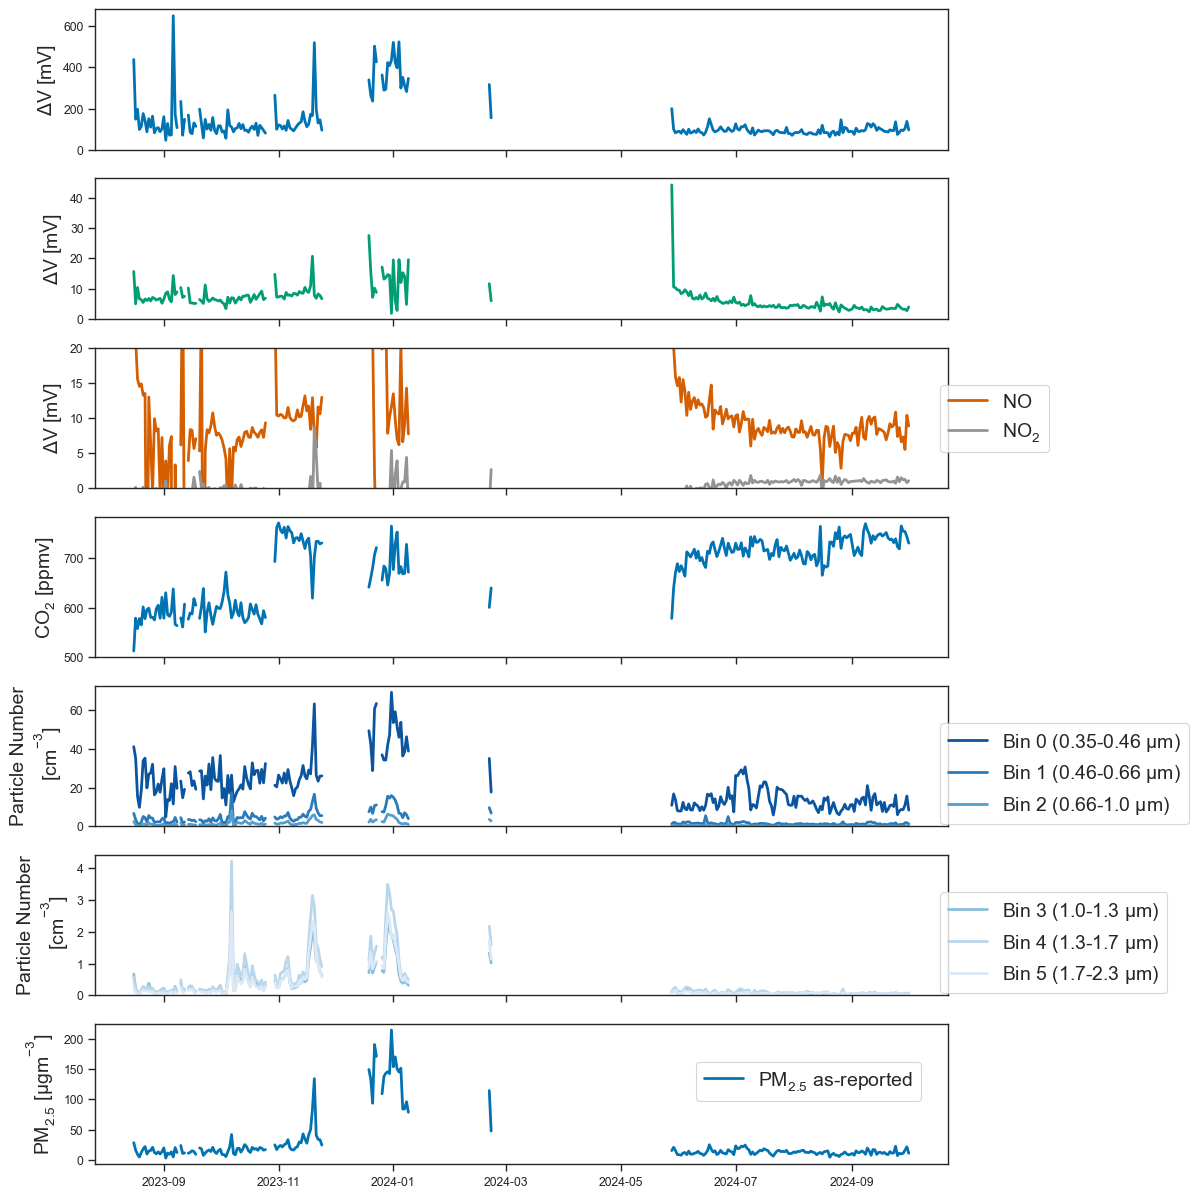

In [10]:
#second version of figure

# set up the matplotlib figure
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(11, 15), sharex=True)

# grab the current color palette
cmap = sns.color_palette()

# plot the CO data and label the axis
ax[0].plot(mit['co_diff'], lw=2, label="$CO$", color=sns.color_palette()[0])
ax[0].set_ylabel("$\Delta V\;[mV]$",fontsize=14)
ax[0].set_ylim(0, None)

# plot the o3 on the second axis
ax[1].plot(mit['ox_diff'], lw=2, label="$O_3$", color=cmap[2])
ax[1].set_ylabel("$\Delta V\;[mV]$",fontsize=14)
ax[1].set_ylim(0, None)


#plot nox on the 3rd axis
ax[2].plot(mit['no_diff'], lw=2, label="$NO$", color=cmap[3])
ax[2].plot(mit['no2_diff'], lw=2, label="$NO_2$", color=cmap[7])
ax[2].set_ylabel("$\Delta V\;[mV]$",fontsize=14)
ax[2].legend(bbox_to_anchor=(0.98, .8),fontsize=14)
ax[2].set_ylim(0, 20)


#plot co2 on the 4th row
ax[3].plot(mit['co2'], lw=2, label="$CO_2$", color=sns.color_palette()[0])
ax[3].set_ylabel("$CO_2$ [ppmv]",fontsize=14)


# plot the OPC bins on the 5th row
ax[4].plot(mit['bin0'], lw=2, label='Bin 0 (0.35-0.46 $\mu m$)', color=sns.color_palette("Blues_r", 6)[0])
ax[4].plot(mit['bin1'], lw=2, label='Bin 1 (0.46-0.66 $\mu m$)', color=sns.color_palette("Blues_r", 6)[1])
ax[4].plot(mit['bin2'], lw=2, label='Bin 2 (0.66-1.0 $\mu m$)', color=sns.color_palette("Blues_r", 6)[2])
ax[4].set(
    ylim=(0, None))
ax[4].set_ylabel("Particle Number\n $[cm^{-3}]$",fontsize=14)
ax[4].legend(bbox_to_anchor=(0.98, .8),fontsize=14)


ax[5].plot(mit['bin3'], lw=2, label='Bin 3 (1.0-1.3 $\mu m$)', color=sns.color_palette("Blues_r", 6)[3])
ax[5].plot(mit['bin4'], lw=2, label='Bin 4 (1.3-1.7 $\mu m$)', color=sns.color_palette("Blues_r", 6)[4])
ax[5].plot(mit['bin5'], lw=2, label='Bin 5 (1.7-2.3 $\mu m$)', color=sns.color_palette("Blues_r", 6)[5])
ax[5].set(
    ylim=(0, None))
ax[5].set_ylabel("Particle Number\n $[cm^{-3}]$",fontsize=14)
ax[5].legend(bbox_to_anchor=(0.98, .8),fontsize=14)


#plot pm25 on the 7th row
ax[6].plot(mit['pm25'], lw=2, label="$PM_{2.5}$ as-reported", color=sns.color_palette()[0])
#ax[6].plot(mit['corr'], lw=2, label="$PM_{2.5}$ corrected", color='black',linestyle='dotted')
ax[6].set_ylabel("$PM_{2.5}$ [$\mu g m^{-3}$]",fontsize=14)
ax[6].legend(bbox_to_anchor=(0.98, .8),fontsize=14)
#ax[6].set(ylim=(0,150))

In [11]:
np.mean(mit['pm25'])


26.538648084337062

In [12]:
#np.mean(mit['corr'])

In [13]:

# label the panels
pct = 0.9
#ax[0].text("2018-1-11 01:00", pct*ax[0].get_ylim()[-1], "(a)")
#ax[1].text("2018-1-11 01:00", pct*ax[1].get_ylim()[-1], "(b)")
#ax[2].text("2018-1-11 01:00", pct*ax[2].get_ylim()[-1], "(c)")


# set titles for each panel
ax[0].set_title("(a) CO", fontsize=14)
ax[1].set_title("(b) $O_3$", fontsize=14)
ax[2].set_title("(c) $NO_x$", fontsize=14)
ax[3].set_title("(d) $CO_2$", fontsize=14)
ax[4].set_title("(e) OPC Particle Counts", fontsize=14)
ax[5].set_title("(f) OPC Particle Counts", fontsize=14)
ax[6].set_title("(g) $PM_{2.5}$", fontsize=14)

ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[2].tick_params(axis='both', which='major', labelsize=14)
ax[3].tick_params(axis='both', which='major', labelsize=14)
ax[4].tick_params(axis='both', which='major', labelsize=14)
ax[5].tick_params(axis='both', which='major', labelsize=14)
ax[6].tick_params(axis='both', which='major', labelsize=14)
ax[6].locator_params(axis='y', nbins=4)
ax[5].locator_params(axis='y', nbins=4)
ax[4].locator_params(axis='y', nbins=4)
ax[3].locator_params(axis='y', nbins=4)
ax[2].locator_params(axis='y', nbins=4)
ax[1].locator_params(axis='y', nbins=4)
ax[0].locator_params(axis='y', nbins=4)


#start = '2022-06-07 4:00'
#fin = '2022-06-11 12:00'

#ax[6].vlines(x=[datetime(2022,6,7,4,0,0),datetime(2022,6,12,12,0,0)],ymin=-5, ymax=300, color='red',linestyle='dashed')

# remove the tiop and right spine
sns.despine()


# force a tight layout
plt.tight_layout()

# save the figure
fig.savefig('timeseries_mV_MOD-00398.png', dpi=350, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>